# Atmospheric Refraction

2023/06/22 H. Akitaya (PERC/CIT)

From Allen's Astrophysical Quantities 4th edition pp. 262--263

In [1]:
import numpy as np

In [43]:
def n_m_1_s(wl):
    """ n-1 of dry air at the nominal condition. (Ref. A.Q. p. 262.)
    wl: wavelength [nm]
    """
    n_m_1_s = 1e-6 * (64.328 + 29498.1e-6/(146.0e-6-1.0/(wl*wl)) + \
                    255.4e-6/(41.0e-6-1.0/(wl*wl)))
    return n_m_1_s

In [45]:
def n_m_1(wl, t, p):
    """ n-1 of arbitrary condition.
    wl: wavelength [nm]
    t: temperature [K]
    p: pressure [Pa]
    """
    TS = 288.15  # Nominal temperature [K]
    PS = 1013.25e2  # Nominal pressure [Pa]
    
    n_m_1 = n_m_1_s(wl)*(p*TS)/(PS*t)
    return n_m_1

In [46]:
def r_0(wl):
    """ Constatnt of refraction.
    """
    T0 = 273.15  # Standard temperature. [K]
    P0 = 1013.25e2  # Standard pressure. [Pa]
    n_m_1_c = n_m_1(wl, T0, P0)
    r_0 = (n_m_1_c*n_m_1_c + 2.0*n_m_1_c) / 2.0 / (n_m_1_c*n_m_1_c + 2.0*n_m_1_c + 1.0)
    return r_0

In [47]:
def r_n_0(wl, zt):
    """ Atmospheric refraction at standard condition.
    wl: wavelength [nm]
    zt: zenith distance [deg]
    """
    r_n_0 = r_0(wl) * np.tan(np.deg2rad(zt))
    return r_n_0

In [48]:
def atm_ref(wl, zt, t, p):
    """ Atmospheric refraction.
    wl: wavelength [nm]
    zt: zenith distance [deg]
    t: temperature [K]
    p: pressure [Pa]
    """
    T0 = 273.15  # Standard temperature. [K]
    P0 = 1013.25e2  # Standard pressure. [Pa]
    r = r_n_0(wl, zt) * (p * T0) / (P0 * t)
    return r

## Plot.

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
# Standard condition.
t = 273.15
p = 1013.25e2

In [51]:
zts = np.linspace(0, 80, 9)

In [52]:
zts

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.])

In [53]:
wls = np.linspace(200, 1000, 9)

In [54]:
wls

array([ 200.,  300.,  400.,  500.,  600.,  700.,  800.,  900., 1000.])

In [55]:
atm_refs = {}

In [61]:
for zt in zts:
    refs = []
    for wl in wls:
        refs.append(r_n_0(wl, zt)*180./np.pi*60.0*60.0)  # radian -> arcsec.
    atm_refs[zt] = refs

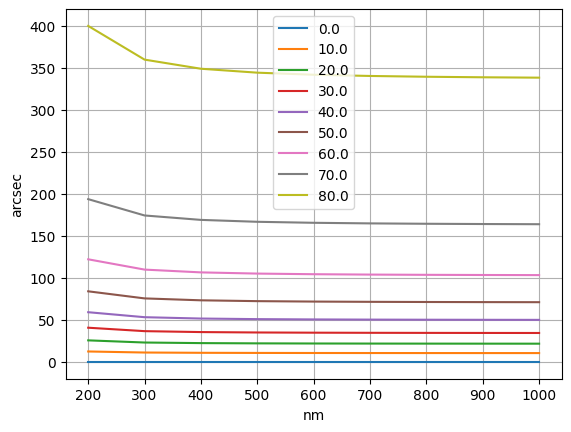

In [68]:
# plot.
plt.xlabel('nm')
plt.ylabel('arcsec')
plt.grid()
for zt in atm_refs.keys():
    plt.plot(wls, atm_refs[zt], label=zt)
plt.legend()
plt.show()

In [79]:
## comparison with AQ. Talbe 11.24.

In [80]:
r_0(220)*180/np.pi*60*60

67.90559458735983

In [81]:
# AQ: 220nm, R = 67.87

In [82]:
r_0(1000)*180/np.pi*60*60

59.626530563337084

In [83]:
# AQ: 1000nm, R = 59.58